In [16]:
cd /staging/leuven/stg_00041/Adrian/TALON_JANISZEWSKI_XCR2/allele_specific/txburst/

/lustre1/project/stg_00041/Adrian/TALON_JANISZEWSKI_XCR2/allele_specific/txburst


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
from scipy.stats import ranksums

In [18]:
# Load inputs

pkl = {}

for name in glob.iglob(r'txburstML/*.pkl'):
    pkl[name.replace(r"txburstML/","")] = pd.read_pickle(name)

In [19]:
def pickle2df(pickle):
    
    pickle = pickle[0][pickle[1]]

    bf = pd.Series([p[0] for p in pickle], index=pickle.index)
    bs = pd.Series([p[2]/p[1] for p in pickle], index=pickle.index)
    me = pd.Series([p[2]*(p[0]/(p[0]+p[1])) for p in pickle], index=pickle.index)

    df = pd.DataFrame([bf,bs,me], index=['bf','bs','me']).T
    
    return df

In [20]:
for key, value in pkl.items(): 
    pkl[key] = pickle2df(value)

In [21]:
allelic_anno = pd.read_csv("GRCm38_91_Non_overlaped.bed", sep = "\t", names=["chr","start","end","GENE"])

In [22]:
chrom_conditions = [(allelic_anno['chr'] == '1'),
                    (allelic_anno['chr'] == '2'),
                    (allelic_anno['chr'] == '3'),
                    (allelic_anno['chr'] == '4'),
                    (allelic_anno['chr'] == '5'),
                    (allelic_anno['chr'] == '6'),
                    (allelic_anno['chr'] == '7'),
                    (allelic_anno['chr'] == '8'),
                    (allelic_anno['chr'] == '9'),
                    (allelic_anno['chr'] == '10'),
                    (allelic_anno['chr'] == '11'),
                    (allelic_anno['chr'] == '12'),
                    (allelic_anno['chr'] == '13'),
                    (allelic_anno['chr'] == '14'),
                    (allelic_anno['chr'] == '15'),
                    (allelic_anno['chr'] == '16'),
                    (allelic_anno['chr'] == '17'),
                    (allelic_anno['chr'] == '18'),
                    (allelic_anno['chr'] == '19'),
                    (allelic_anno['chr'] == 'X'),
                    (allelic_anno['chr'] == 'MT'),
                    (allelic_anno['chr'] == 'Y')]
outcome = ['1', '2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','X_linked','mitochondrial','Y_linked']

In [23]:
allelic_anno['chrom_group'] = np.select(chrom_conditions, outcome)

In [24]:
allelic_anno

,chr,start,end,GENE,chrom_group
0,1,3073253,3074322,4933401J01Rik,1
1,1,3205901,3671498,Xkr4,1
2,1,3999557,4409241,Rp1,1
3,1,4490931,4497354,Sox17,1
4,1,4773206,4785739,MTrpl15,1
...,...,...,...,...,...
30304,Y,61102247,61134259,1700040F15Rik,Y_linked
30305,Y,67045743,67048072,Ssty2,Y_linked
30306,Y,70367444,70370583,4932431L22Rik,Y_linked
30307,Y,90753057,90763485,MTid1-ps1,Y_linked


In [25]:
for key, value in pkl.items():
    pkl[key] = value.merge(allelic_anno, on="GENE", how="left")

In [26]:
for key, value in pkl.items():
    pkl[key] = value[value.chrom_group.isin(['1', '2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','X_linked'])]

In [46]:
def bf_boxplot(df, title, export = True):
    import seaborn as sns
    
    fig = plt.figure(figsize = (5,4))
    
    sns.boxplot( x=df["chrom_group"], y=np.log10(df['bf']), 
                order=['X_linked','1', '2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19'], 
               width = 0.7, linewidth = 1, showfliers=False,)
    plt.xlabel("chromosome")
    plt.ylabel("Burst frequency")
    plt.title(title)
    

    #axes = plt.gca()
    #axes.set_xlim([-0.1,4])
    #axes.set_ylim([-3,1])
    

    if export:
        plt.savefig("BFboxXA " + title + ".pdf", format = "pdf")

/data/leuven/331/vsc33185/yes/envs/Python_ML/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/data/leuven/331/vsc33185/yes/envs/Python_ML/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/data/leuven/331/vsc33185/yes/envs/Python_ML/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplo

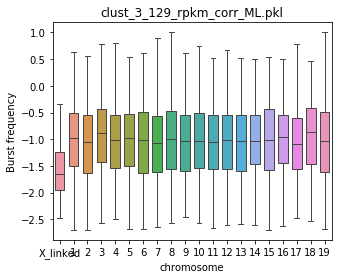

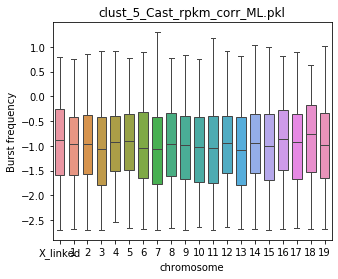

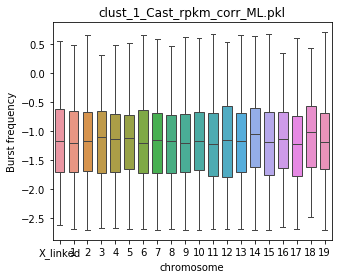

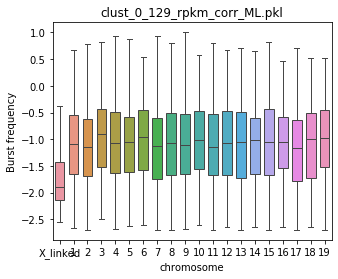

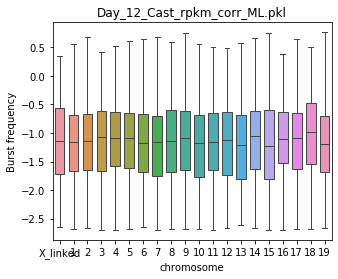

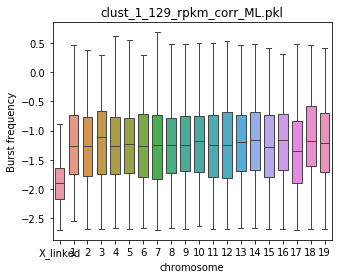

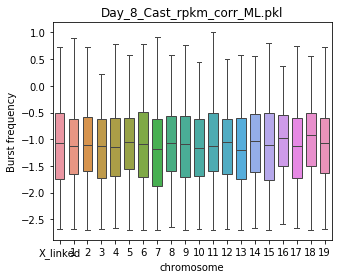

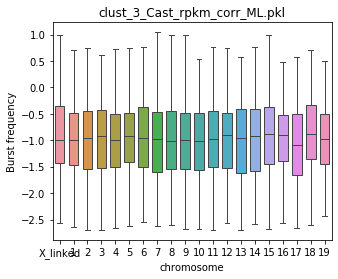

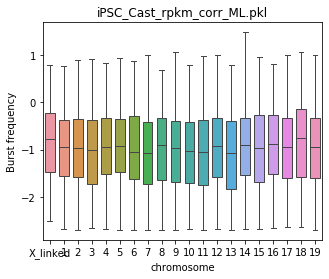

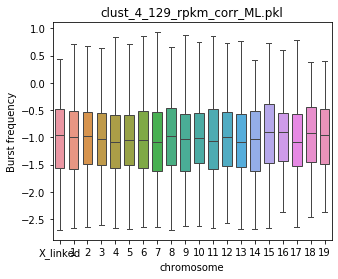

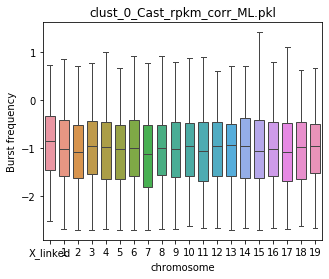

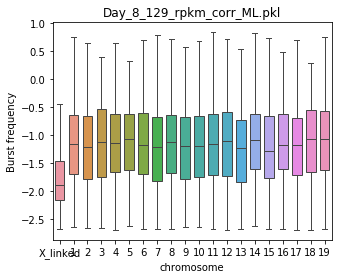

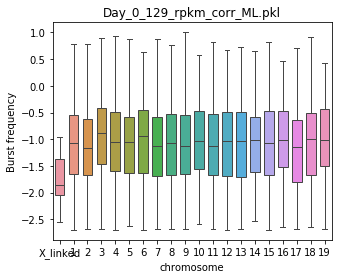

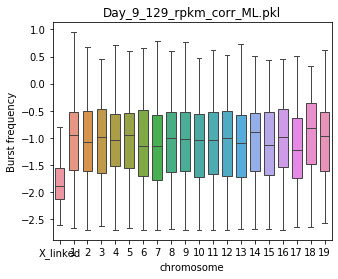

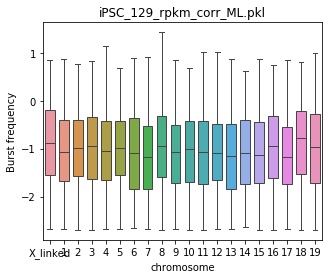

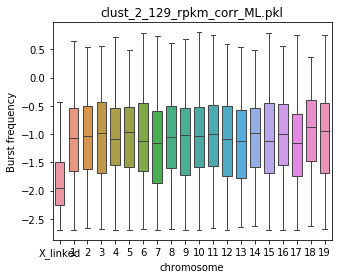

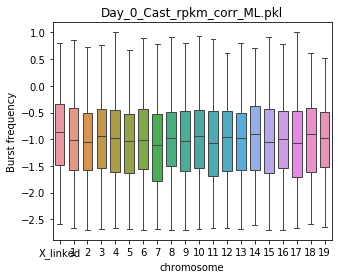

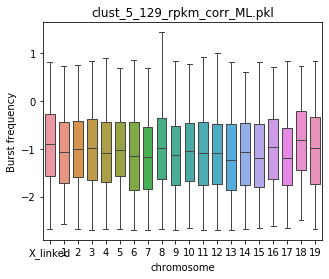

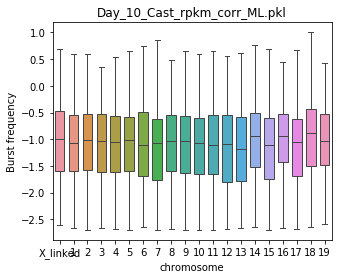

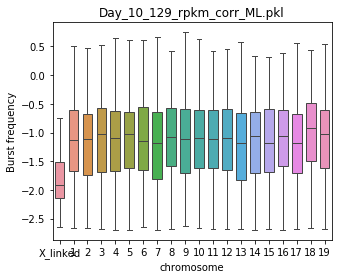

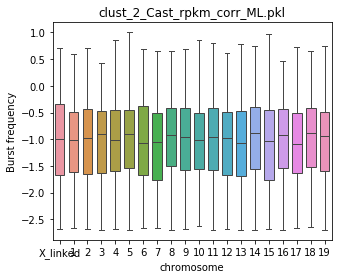

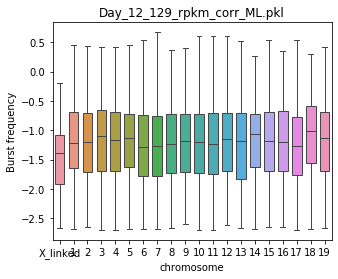

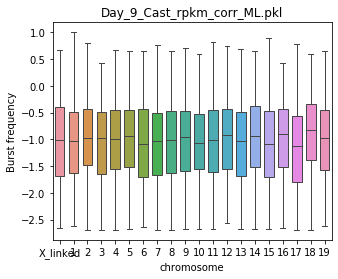

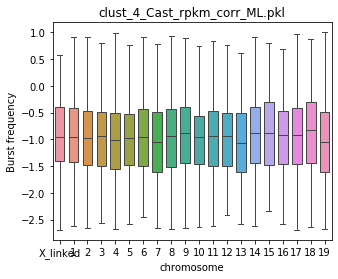

In [47]:
for key, value in pkl.items():
    bf_boxplot(value, key, export = True)

In [44]:
def bf_hist(df, title):
    plt.hist(np.log10(df.bf), bins=100)
    plt.xlabel(r'Burst frequency (log$_{10}$)')
    plt.show()

In [45]:
def bf_density(df, title, export = True):  
    import seaborn as sns
    # Done much easier using displot in new seaborn 0.11
    
    auto = df[df["chrom_group"] == 'autosomes']
    X = df[df["chrom_group"] == 'X_linked']
    
    fig = plt.figure(figsize = (5,1.5))
    
    sns.distplot(np.log2(auto.bf), hist=False, color='lightslategrey')
    plt.axvline(np.median(np.log2(auto.bf)),color='lightslategrey', linestyle='--')

    sns.distplot(np.log2(X.bf), hist=False, color ='salmon')
    plt.axvline(np.median(np.log2(X.bf)),color='salmon', linestyle='--')
    
    #fig.legend(labels=['autosomes','X_linked'])
    plt.title(title)
    
    plt.xlim(-11, 11)
    
    #plt.rcParams['pdf.use14corefonts'] = True
    plt.rcParams['ps.fonttype'] = 42
    
    if export:
        plt.savefig("BF " + title + ".pdf", format = "pdf")

In [50]:
def bs_density(df, title, export = True):  
    import seaborn as sns
    # Done much easier using displot in new seaborn 0.11
    auto = df[df["chrom_group"] == 'autosomes']
    X = df[df["chrom_group"] == 'X_linked']
    
    fig = plt.figure(figsize = (5,1.5))
    
    sns.distplot(np.log10(auto.bs), hist=False, color='lightslategrey')
    
    plt.axvline(np.median(np.log10(auto.bs)),color='lightslategrey', linestyle='--')

    sns.distplot(np.log10(X.bs), hist=False, color ='darkorange')
    plt.axvline(np.median(np.log10(X.bs)),color='darkorange', linestyle='--')
    
    plt.rcParams['ps.fonttype'] = 42
    #fig.legend(labels=['autosomes','X_linked'])
    plt.title(title)
    
    plt.xlim(-1, 5)
    
    if export:
        plt.savefig("BS " + title + ".pdf", format = "pdf")  

In [56]:
def bf_bs_median(df, title):
    # want median of bf and bs for autosomes and X-linked
    auto = df[df["chrom_group"] == 'autosomes']
    X = df[df["chrom_group"] == 'X_linked']
    
    auto_bf_bs = [np.median(np.log2(auto.bf)), np.median(np.log2(auto.bs))]
    X_bf_bs = [np.median(np.log2(X.bf)), np.median(np.log2(X.bs))]
    
    medians = pd.DataFrame(list(zip(auto_bf_bs, X_bf_bs)),  columns = ["Autosomes","X_linked"], index =["bf","bs"])
    
    medians.columns = pd.MultiIndex.from_product([[title],medians.columns])
    display(medians)


In [57]:
for key, value in pkl.items():
    bf_bs_median(value, key)

clust_3_129_rpkm_corr_ML.pkl          
                      Autosomes  X_linked
bf                    -3.377342 -5.495775
bs                     4.433115  4.529742

clust_5_Cast_rpkm_corr_ML.pkl          
                       Autosomes  X_linked
bf                     -3.248428 -2.900834
bs                      4.086811  3.962262

clust_1_Cast_rpkm_corr_ML.pkl          
                       Autosomes  X_linked
bf                     -3.860592 -3.877611
bs                      4.893630  4.418042

clust_0_129_rpkm_corr_ML.pkl          
                      Autosomes  X_linked
bf                    -3.520016 -6.288388
bs                     4.010650  2.553183

Day_12_Cast_rpkm_corr_ML.pkl          
                      Autosomes  X_linked
bf                    -3.768297 -3.799581
bs                     4.750684  4.258115

clust_1_129_rpkm_corr_ML.pkl          
                      Autosomes  X_linked
bf                    -4.093184 -6.319275
bs                     4.670891  3.332682

Day_8_Cast_rpkm_corr_ML.pkl          
                     Autosomes  X_linked
bf                   -3.641252 -3.549293
bs                    4.775731  4.641827

clust_3_Cast_rpkm_corr_ML.pkl          
                       Autosomes  X_linked
bf                     -3.213247 -3.315416
bs                      4.744427  4.741704

iPSC_Cast_rpkm_corr_ML.pkl          
                    Autosomes  X_linked
bf                  -3.208335 -2.605014
bs                   4.047263  4.075729

clust_4_129_rpkm_corr_ML.pkl          
                      Autosomes  X_linked
bf                    -3.389147 -3.187226
bs                     4.407979  4.437068

clust_0_Cast_rpkm_corr_ML.pkl          
                       Autosomes  X_linked
bf                     -3.355604 -2.816769
bs                      4.351254  3.584932

Day_8_129_rpkm_corr_ML.pkl          
                    Autosomes  X_linked
bf                  -3.855044 -6.272823
bs                   4.431849  3.937345

Day_0_129_rpkm_corr_ML.pkl          
                    Autosomes  X_linked
bf                  -3.497840 -6.154950
bs                   4.004652  2.885038

Day_9_129_rpkm_corr_ML.pkl          
                    Autosomes  X_linked
bf                  -3.458814 -6.284196
bs                   4.265804  3.620026

iPSC_129_rpkm_corr_ML.pkl          
                   Autosomes  X_linked
bf                 -3.466653 -2.926715
bs                  3.827125  3.923837

clust_2_129_rpkm_corr_ML.pkl          
                      Autosomes  X_linked
bf                    -3.466692 -6.466529
bs                     4.230112  3.699526

Day_0_Cast_rpkm_corr_ML.pkl          
                     Autosomes  X_linked
bf                   -3.344535 -2.893460
bs                    4.335729  3.588479

clust_5_129_rpkm_corr_ML.pkl          
                      Autosomes  X_linked
bf                    -3.557970 -2.974616
bs                     3.849206  4.007731

Day_10_Cast_rpkm_corr_ML.pkl          
                      Autosomes  X_linked
bf                    -3.462386 -3.326030
bs                     4.657197  4.301934

Day_10_129_rpkm_corr_ML.pkl          
                     Autosomes  X_linked
bf                   -3.659820 -6.331618
bs                    4.541398  4.052115

clust_2_Cast_rpkm_corr_ML.pkl          
                       Autosomes  X_linked
bf                     -3.247285 -3.277221
bs                      4.425373  4.049676

Day_12_129_rpkm_corr_ML.pkl          
                     Autosomes  X_linked
bf                   -3.940911 -4.587112
bs                    4.482544  4.563038

Day_9_Cast_rpkm_corr_ML.pkl          
                     Autosomes  X_linked
bf                   -3.306662 -3.357622
bs                    4.471561  4.303409

clust_4_Cast_rpkm_corr_ML.pkl          
                       Autosomes  X_linked
bf                     -3.179888 -3.192013
bs                      4.686272  4.767918

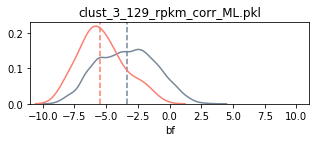

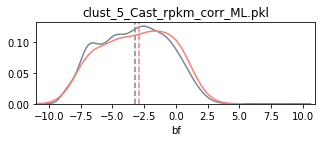

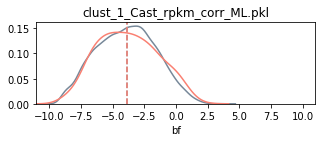

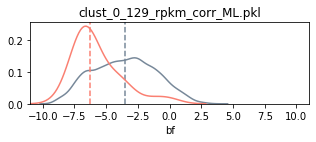

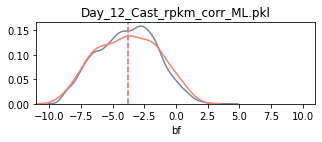

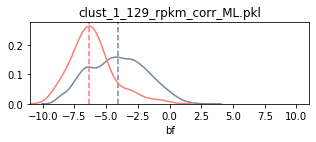

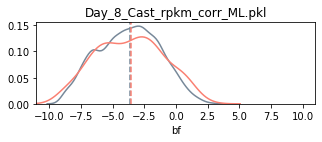

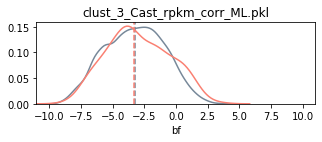

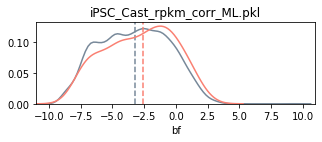

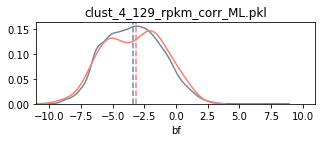

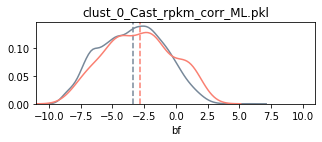

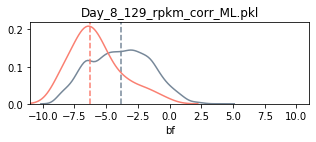

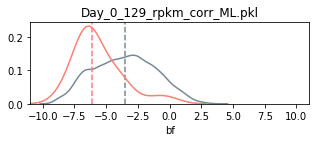

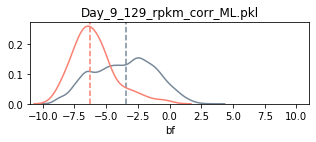

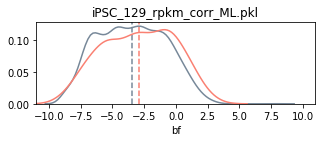

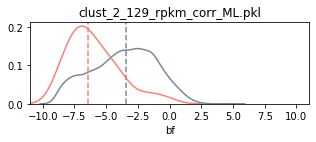

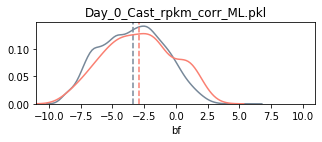

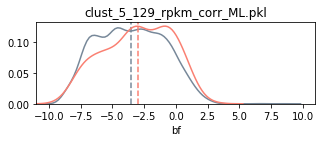

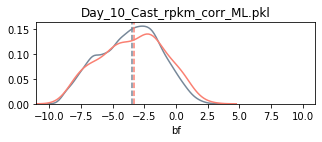

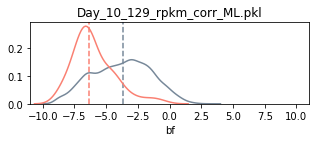

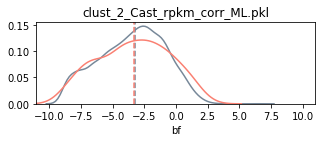

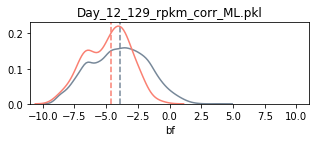

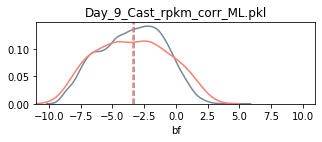

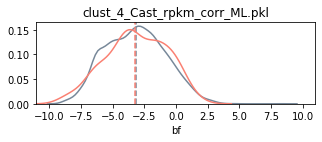

In [49]:
for key, value in pkl.items():
    bf_density(value, key, export = True)

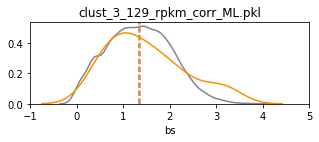

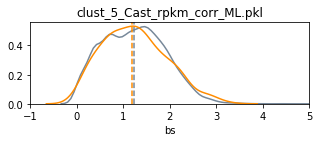

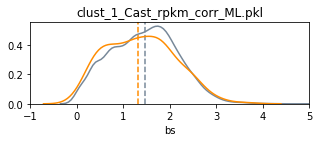

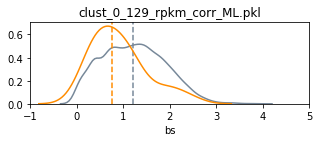

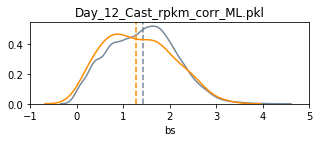

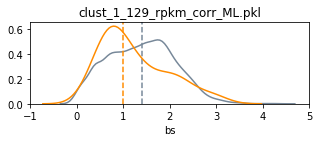

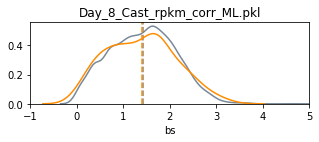

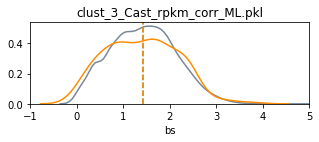

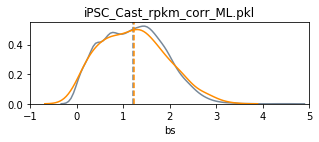

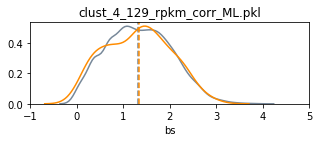

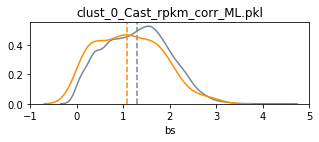

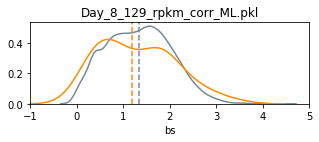

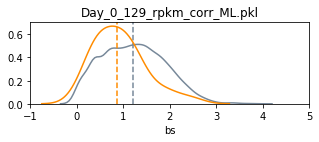

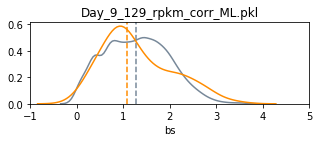

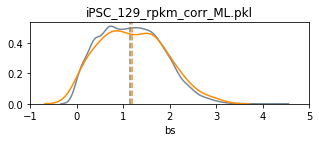

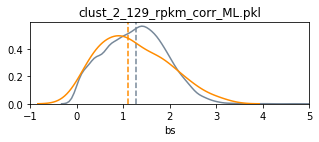

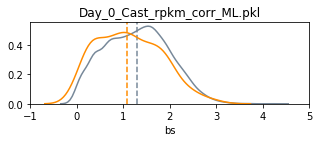

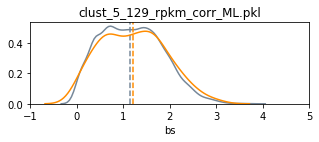

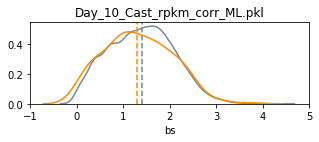

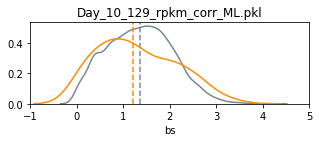

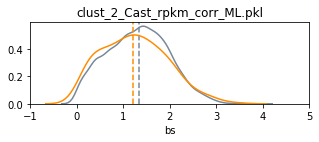

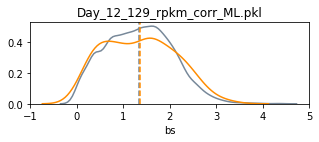

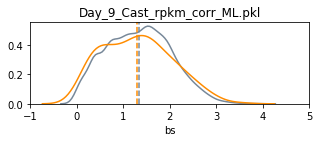

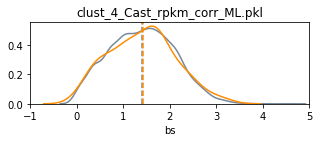

In [51]:
for key, value in pkl.items():
    bs_density(value, key, export = True)

In [72]:
def bf_bs_ranksums(df, title):
    # Test whether theres sign diff between x and auto on bf and bs
    
    auto = df[df["chrom_group"] == 'autosomes']
    X = df[df["chrom_group"] == 'X_linked']
    
    auto_bf = np.array(np.log2(auto.bf))
    X_bf = np.array(np.log2(X.bf))
    
    bf_result = ranksums(auto_bf, X_bf)
    
    auto_bs = np.array(np.log2(auto.bs))
    X_bs = np.array(np.log2(X.bs))
    
    bs_result = ranksums(auto_bs, X_bs)
    
    results = pd.DataFrame(list(zip(bf_result, bs_result)), columns=["bf","bs"], index =["statistic","pval"])
    
    results.columns = pd.MultiIndex.from_product([[title],results.columns])
    return results

In [73]:
wilcoxon_results = []
for key, value in pkl.items():
    results = bf_bs_ranksums(value, key)
    wilcoxon_results.append(results)  

In [74]:
wilcoxon_results

[          clust_3_129_rpkm_corr_ML.pkl          
                                     bf        bs
 statistic                 6.110952e+00 -0.826860
 pval                      9.903884e-10  0.408316,
           clust_5_Cast_rpkm_corr_ML.pkl          
                                      bf        bs
 statistic                     -1.569081 -0.046442
 pval                           0.116629  0.962958,
           clust_1_Cast_rpkm_corr_ML.pkl          
                                      bf        bs
 statistic                     -0.556203  1.733066
 pval                           0.578072  0.083084,
           clust_0_129_rpkm_corr_ML.pkl          
                                     bf        bs
 statistic                     4.889667  2.677762
 pval                          0.000001  0.007412,
           Day_12_Cast_rpkm_corr_ML.pkl          
                                     bf        bs
 statistic                    -0.146141  2.193300
 pval                          0.88381

In [75]:
from functools import reduce
wilcoxon_results_df = reduce(lambda x, y: pd.merge(x, y, left_index=True, right_index=True), wilcoxon_results)

In [76]:
wilcoxon_results_df

clust_3_129_rpkm_corr_ML.pkl            \
                                    bf        bs   
statistic                 6.110952e+00 -0.826860   
pval                      9.903884e-10  0.408316   

          clust_5_Cast_rpkm_corr_ML.pkl            \
                                     bf        bs   
statistic                     -1.569081 -0.046442   
pval                           0.116629  0.962958   

          clust_1_Cast_rpkm_corr_ML.pkl            \
                                     bf        bs   
statistic                     -0.556203  1.733066   
pval                           0.578072  0.083084   

          clust_0_129_rpkm_corr_ML.pkl           Day_12_Cast_rpkm_corr_ML.pkl  \
                                    bf        bs                           bf   
statistic                     4.889667  2.677762                    -0.146141   
pval                          0.000001  0.007412                     0.883810   

                     ... Day_10_129_rpkm_corr_ML.pkl            \
                 bs  ...                          bf        bs   
statistic  2.193300  ...                1.068615e+01  1.297337   
pval       0.028286  ...                1.181752e-26  0.194515   

          clust_2_Cast_rpkm_corr_ML.pkl           Day_12_129_rpkm_corr_ML.pkl  \
                                     bf        bs                          bf   
statistic                     -0.714724  1.783855                5.801095e+00   
pval                           0.474779  0.074447                6.588323e-09   

                    Day_9_Cast_rpkm_corr_ML.pkl            \
                 bs                          bf        bs   
statistic -0.072204                   -0.100034  1.014870   
pval       0.942440                    0.920317  0.310168   

          clust_4_Cast_rpkm_corr_ML.pkl            
                                     bf        bs  
statistic                     -0.641118  0.007561  
pval                           0.521446  0.993967  

[2 rows x 48 columns]